# **Resampling Datetime Data**

_John Andrew Dixon_

---

##### **Imports**

In [44]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import pandas as pd

##### **Data Load**

In [45]:
# Remote URL to data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRUYt14HmU-FcylS-9o7kn-rHrHcTwZvpOeL-7NgpOiaTrpROPDqOB1Ulf7XJoc8npblAYEjsCxNJIC/pub?output=csv"
# Load the data
df = pd.read_csv(url)
# Verify it loaded
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


---

## **Load the data and make a datetime index**

In [46]:
# Convert the date column to datetime dtype.
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


In [47]:
# Set the date column as the index.
df.set_index("date", inplace=True)
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [48]:
# Keep only data from the year 2000 or later.
# Keep only the following features: precipitation, mean_temp, min_temp, max_temp, snow_depth
final_df = df.loc["2000":].drop(columns=["cloud_cover", "sunshine", "global_radiation", "pressure"])
final_df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


#### **Impute Missing Values**

In [49]:
# Gauge missing values
print("Missing Values:")
final_df.isna().sum()

Missing Values:


max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

- In order to guage how best to impute the missing values per feature I will plot each for two different years:

In [50]:
# Set default figure size.
plt.rcParams['figure.figsize'] = (20, 5)

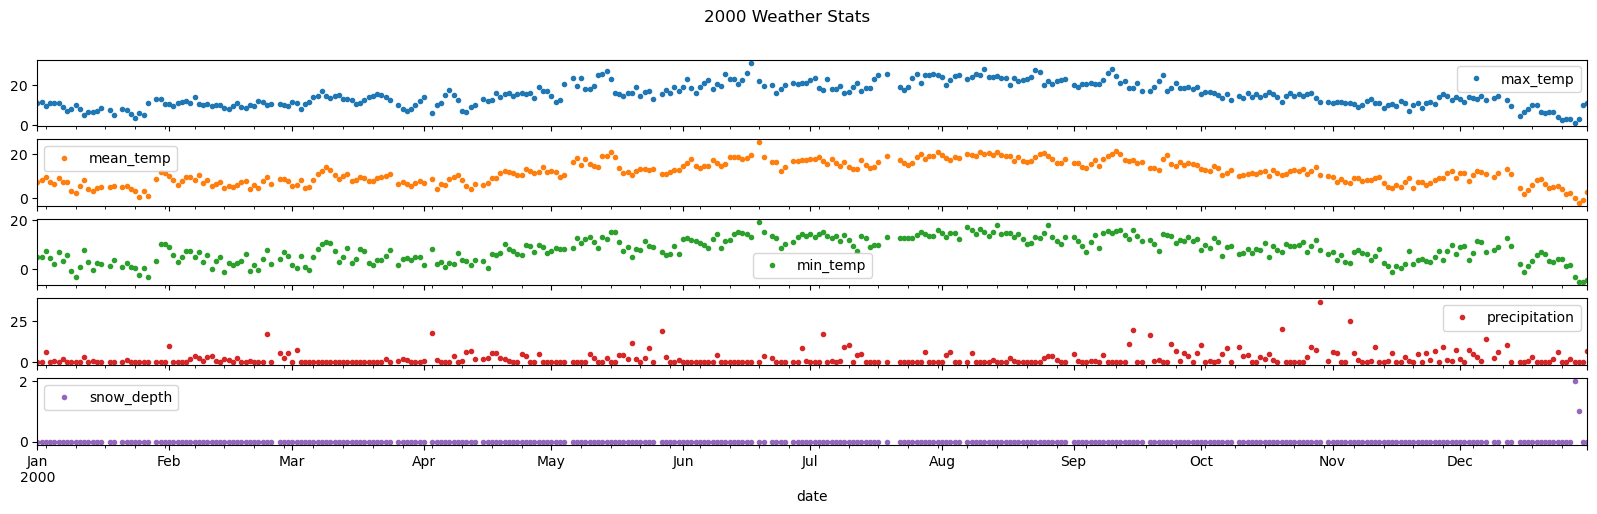

In [51]:
final_df.loc["2000"].plot(subplots=True, title="2000 Weather Stats", style=".");

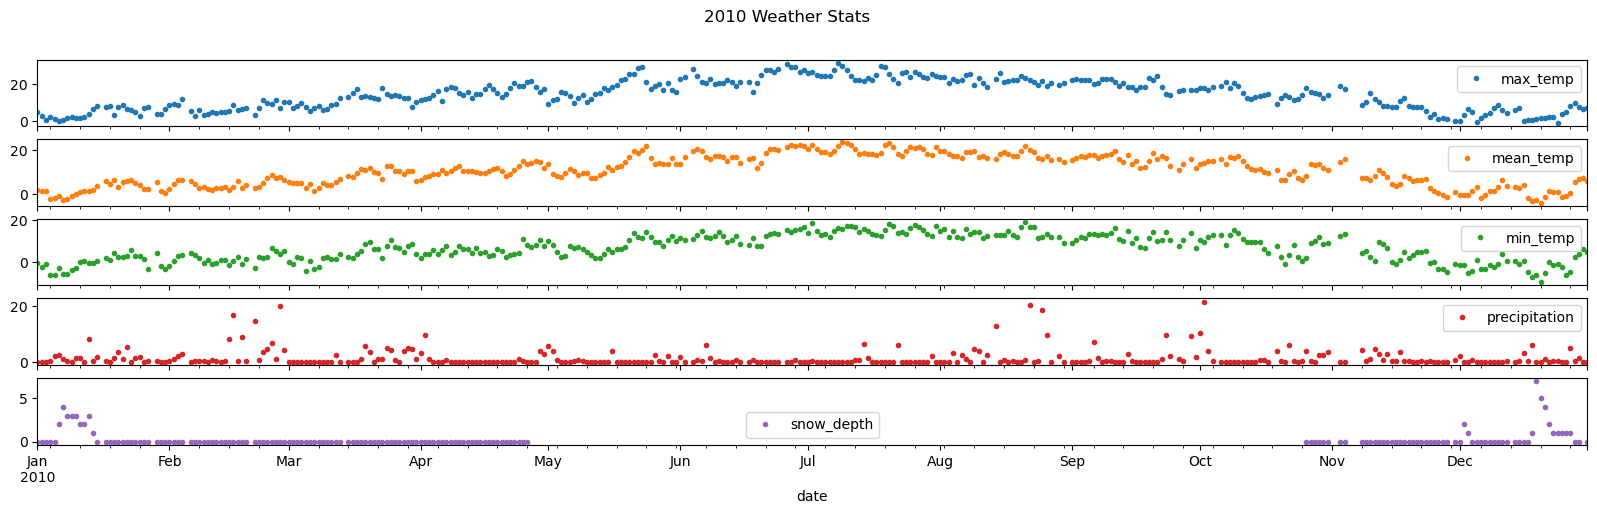

In [52]:
final_df.loc["2010"].plot(subplots=True, title="2010 Weather Stats", style=".");

- All three features dealing with temperature show gradual changes from day to day. For one day, the day before is similar to it as is the day after (either slightly lower or slightly higher). Likewise, from my experience, temperatures change from day to day and are similar across a week, only changing gradually across days. Based on all of this, I believe interpolation is the best method for these three features.
- The `snow_depth` feature is similar to the features dealing with temperature. Most days don't have snow depths, but for those that do we see a giant spike and a gradual decay. From a logical perspective, I believe this makes sense as snow takes a while to melt as well as acrue, changing from one day to the next in a non-random, somewhat gradual way. So, I believe interpolation is best for this feature as well.
- The `precipitation` feature shows the most difference amongst the five. From one day to the next there is high precipitation and then none. Some intervals of time have no precipitation except one or two random days. The level of precipitation from one day to the doesn't seem to follow a strict pattern of decreasing or increasing. Likewise, in day-to-day life, rain often shows up randomly and disappears the next day. The amount of rain, at times, appears random too. So, I believe either back-filling or forward-filling would be the best imputation strategy. Looking back at the plot, I believe back-filling makes the most sense since I frequently see a few days of rain and then random stoppage.

In [53]:
final_df.loc["2000"]

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2000-12-27,2.9,2.2,1.5,1.8,0.0
2000-12-28,1.2,-0.3,-3.5,0.0,2.0
2000-12-29,3.1,-2.2,-5.5,0.0,1.0


In [54]:
# Impute the values
final_df["max_temp"].interpolate(inplace=True)
final_df["mean_temp"].interpolate(inplace=True)
final_df["min_temp"].interpolate(inplace=True)
final_df["snow_depth"].interpolate(inplace=True)
final_df["precipitation"].fillna(method="bfill", inplace=True)

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7671 non-null   float64
 1   mean_temp      7671 non-null   float64
 2   min_temp       7671 non-null   float64
 3   precipitation  7671 non-null   float64
 4   snow_depth     7671 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


## **Answer the Questions with Visualizations (Using the Correct Frequency)**

#### **_What month had the most precipitation between 2000 through 2010?_**

In [64]:
# Resample the data as Monthly frequency.
monthly_df = final_df.copy().loc["2000":"2010"][["precipitation"]].resample("MS").mean()
monthly_df.head()

,precipitation
date,
2000-01-01,0.474194
2000-02-01,2.324138
2000-03-01,0.458065
2000-04-01,3.026667
2000-05-01,2.819355


In [57]:
# Find the date and corresponding value for the max precipitation.
max_precipitation_id = monthly_df["precipitation"].idxmax()
max_precipitation_val = monthly_df.loc[max_precipitation_id]
max_precipitation_val

precipitation    4.893333
Name: 2009-11-30 00:00:00, dtype: float64

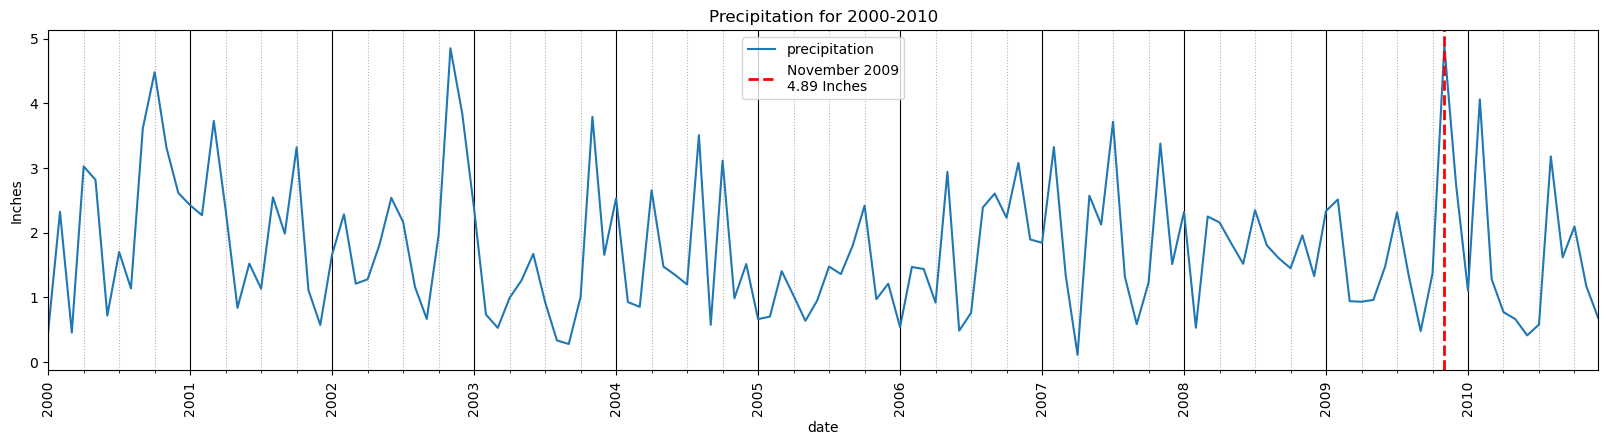

In [58]:
# Figure creation and labeling
fig, ax = plt.subplots(figsize=(20, 5))
monthly_df["precipitation"].plot(ax=ax)
ax.set_title("Precipitation for 2000-2010")
ax.set_ylabel("Inches")

# Major xaxis ticks formatting
ax.grid(which='major',axis='x', color='k')
fig.autofmt_xdate(rotation=90, ha='center')

# Minor xaxis ticks formatting
ax.grid(which='minor', axis='x', ls=":")

# Add a vertical line denoting the max precipitation
ax.axvline(max_precipitation_id, 
           color="red",
           label=f"{max_precipitation_id.strftime('%B %Y')}\n{round(max_precipitation_val[0], 2)} Inches",
           ls="--",
           linewidth=2);
ax.legend();

- The month that had the most precipitation between 2000 through 2010 was November 2009?

#### **_Which year between 2000-2020 had the coolest average temperature?_**

In [71]:
# Resample the data as Monthly frequency.
yearly_df = final_df.copy().loc["2000":"2020"][["mean_temp"]].resample("AS").mean()
yearly_df.head()

,mean_temp
date,
2000-01-01,11.575683
2001-01-01,11.331507
2002-01-01,12.084247
2003-01-01,12.114521
2004-01-01,11.900683


##### **Do please read**

Have you ever lied or stolen something? Maybe you've lusted or were jealous of others? Certainly, you've failed to love God with all your heart, mind, soul and strength and you've failed to love your neighbor as yourself. If you've done even just one of these, you've sinned and are a sinner. You're a liar, or thief, or adulterer or all three at once and more! You're guilty of breaking God's law and if you die in your sins you **_will_** go to hell, regardless of what you believe about yourself or God. 

But, there is good news: Ggod loved us so much that he sent his only be